# MACHINE LEARNING PROJECT

# Nam Pham - BS19BDS025

#                                               PART 2

The part 2 of this project will continue on data analysis and model building using the cleaned sales dataset from Part 1. Since the dataset is now available, you can run the codes to see check its efficiency.

# First, we will still import neccessary libraries and objects 

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

# Explore the sale dataset

In [2]:
df=pd.read_csv('sale.csv')
print(df)

                  LAND_TYPE  SURFACE  USED_SURFACE LEGAL_STATUS  \
0      mua-nha-mat-tien-pho    200.0          40.0      sổ hồng   
1           mua-nha-hem-ngo     80.0          80.0      sổ hồng   
2           mua-nha-hem-ngo    120.0          98.0      sổ hồng   
3            mua-dat-tho-cu    130.0         130.0      sổ hồng   
4       mua-can-ho-chung-cu     52.0          52.0      sổ hồng   
...                     ...      ...           ...          ...   
82620       mua-nha-hem-ngo     72.0         182.0      sổ hồng   
82621  mua-nha-mat-tien-pho     85.5         300.0      sổ hồng   
82622  mua-nha-mat-tien-pho     54.0         160.0      sổ hồng   
82623       mua-nha-hem-ngo     55.0          81.0      sổ hồng   
82624  mua-nha-mat-tien-pho    100.0         300.0      sổ hồng   

        PRO_DIRECTION  BEDROOM  BATHROOM  \
0                 nam        4         4   
1      không xác định        5         5   
2      không xác định        6         6   
3            đông n

In [3]:
#Create a dataframe from the data set
hcm_sale = pd.DataFrame(df)
hcm_sale

,LAND_TYPE,SURFACE,USED_SURFACE,LEGAL_STATUS,PRO_DIRECTION,BEDROOM,BATHROOM,FULL_ADDRESS,STREET,WARD,DISTRICT,CITY,PRO_FLAG,PRICE,PRICE_UNIT,PRICE_M2,USED_SURFACE_imp
0,mua-nha-mat-tien-pho,200.0,40.0,sổ hồng,nam,4,4,"đường số 3, quận bình tân, tp.hcm",đường số 3,MISSING,quận bình tân,tphcm,12,16.00,tỷ,80.0000,40.0
1,mua-nha-hem-ngo,80.0,80.0,sổ hồng,không xác định,5,5,"lê đức thọ, phường 7, quận gò vấp, tp.hcm",lê đức thọ,phường 7,quận gò vấp,tphcm,12,8.30,tỷ,103.7500,80.0
2,mua-nha-hem-ngo,120.0,98.0,sổ hồng,không xác định,6,6,"dương quảng hàm, phường 5, quận gò vấp, tp.hcm",dương quảng hàm,phường 5,quận gò vấp,tphcm,12,9.00,tỷ,75.0000,98.0
3,mua-dat-tho-cu,130.0,130.0,sổ hồng,đông nam,0,0,"cầu xây, phường tân phú, quận 9, tp.hcm",cầu xây,phường tân phú,quận 9,tphcm,12,4.30,tỷ,33.0769,130.0
4,mua-can-ho-chung-cu,52.0,52.0,sổ hồng,đông nam,2,1,"nguyễn hữu thọ, xã phước kiển, huyện nhà bè, t...",nguyễn hữu thọ,xã phước kiển,huyện nhà bè,tphcm,12,1.34,tỷ,25.7692,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82620,mua-nha-hem-ngo,72.0,182.0,sổ hồng,đông nam,5,5,"thành thái, quận 10, tp.hcm",thành thái,MISSING,quận 10,tphcm,12,9.50,tỷ,131.9440,182.0
82621,mua-nha-mat-tien-pho,85.5,300.0,sổ hồng,không xác định,6,6,"trần bình trọng, phường 2, quận 10, tp.hcm",trần bình trọng,phường 2,quận 10,tphcm,12,15.40,tỷ,180.1170,300.0
82622,mua-nha-mat-tien-pho,54.0,160.0,sổ hồng,không xác định,6,6,"trần bình trọng, phường 10, quận 10, tp.hcm",trần bình trọng,phường 10,quận 10,tphcm,12,12.90,tỷ,238.8890,160.0
82623,mua-nha-hem-ngo,55.0,81.0,sổ hồng,không xác định,5,5,"nguyễn duy dương, phường 9, quận 10, tp.hcm",nguyễn duy dương,phường 9,quận 10,tphcm,12,5.90,tỷ,107.2730,81.0


In [4]:
# Check all columns in the dataset
print(hcm_sale.columns)

Index(['LAND_TYPE', 'SURFACE', 'USED_SURFACE', 'LEGAL_STATUS', 'PRO_DIRECTION',
       'BEDROOM', 'BATHROOM', 'FULL_ADDRESS', 'STREET', 'WARD', 'DISTRICT',
       'CITY', 'PRO_FLAG', 'PRICE', 'PRICE_UNIT', 'PRICE_M2',
       'USED_SURFACE_imp'],
      dtype='object')


In [5]:
# Drop unneccessary columns
hcm_sale = hcm_sale.drop(columns = ['CITY','PRO_FLAG','PRICE_UNIT','PRICE_M2','USED_SURFACE_imp'])

In [6]:
print(hcm_sale.describe())

            SURFACE  USED_SURFACE       BEDROOM      BATHROOM         PRICE
count  8.262500e+04  8.262500e+04  82625.000000  82625.000000  82625.000000
mean   4.123764e+03  2.201530e+04      6.838269      6.738070     36.284259
std    9.090358e+05  3.426289e+06      9.633797      9.715237    129.959131
min    0.000000e+00  1.000000e+00      0.000000      0.000000      1.000000
25%    6.040000e+01  7.100000e+01      3.000000      2.000000      6.700000
50%    8.730000e+01  1.020000e+02      4.000000      4.000000     13.000000
75%    1.312500e+02  1.960000e+02      6.000000      6.000000     28.000000
max    2.500000e+08  6.500000e+08    100.000000    100.000000   8500.000000


# Define a function that tells how many NA and their percentage in each column

Based on the data cleaning session from Part 1, we will see if the sale dataset has been all cleaned or else it is needed for further pre-processing

In [7]:
def missing_values_table(df):
    # Percentage of missing values
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing value in descending order
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print summary information
    print("\nThe Dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [8]:
missing_values_table(hcm_sale)


The Dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Comment

There are no columns with missing values in the sale dataset this time, so it seems like the data cleaning process has been accomplished.

# Data Type Conversion

To predict the sale prices we are going to use the following linear regression algorithms. Our final step in the EDA process is to check the data types that are present in our variables. In case if there is any float or object type variable, we have to convert them into integer type for the linear regression to work fine on them.

In [9]:
# Check where data type is object
hcm_sale.select_dtypes(np.object).dtypes.reindex(sorted(hcm_sale.select_dtypes(np.object).columns), axis=1)

DISTRICT         object
FULL_ADDRESS     object
LAND_TYPE        object
LEGAL_STATUS     object
PRO_DIRECTION    object
STREET           object
WARD             object
dtype: object

In [10]:
# converting type of columns to 'category'
hcm_sale['DISTRICT'] = hcm_sale['DISTRICT'].astype('category')
hcm_sale['LAND_TYPE'] = hcm_sale['LAND_TYPE'].astype('category')
hcm_sale['LEGAL_STATUS'] = hcm_sale['LEGAL_STATUS'].astype('category')
hcm_sale['PRO_DIRECTION'] = hcm_sale['PRO_DIRECTION'].astype('category')
hcm_sale['STREET'] = hcm_sale['STREET'].astype('category')
hcm_sale['WARD'] = hcm_sale['WARD'].astype('category')

# Assigning numerical values and storing in another column
hcm_sale['DISTRICT'] = hcm_sale['DISTRICT'].cat.codes
hcm_sale['LAND_TYPE'] = hcm_sale['LAND_TYPE'].cat.codes
hcm_sale['LEGAL_STATUS'] = hcm_sale['LEGAL_STATUS'].cat.codes
hcm_sale['PRO_DIRECTION'] = hcm_sale['PRO_DIRECTION'].cat.codes
hcm_sale['STREET'] = hcm_sale['STREET'].cat.codes
hcm_sale['WARD'] = hcm_sale['WARD'].cat.codes
hcm_sale

,LAND_TYPE,SURFACE,USED_SURFACE,LEGAL_STATUS,PRO_DIRECTION,BEDROOM,BATHROOM,FULL_ADDRESS,STREET,WARD,DISTRICT,PRICE
0,18,200.0,40.0,4,2,4,4,"đường số 3, quận bình tân, tp.hcm",2137,0,18,16.00
1,17,80.0,80.0,4,1,5,5,"lê đức thọ, phường 7, quận gò vấp, tp.hcm",1121,24,19,8.30
2,17,120.0,98.0,4,1,6,6,"dương quảng hàm, phường 5, quận gò vấp, tp.hcm",847,22,19,9.00
3,9,130.0,130.0,4,8,0,0,"cầu xây, phường tân phú, quận 9, tp.hcm",825,97,16,4.30
4,0,52.0,52.0,4,8,2,1,"nguyễn hữu thọ, xã phước kiển, huyện nhà bè, t...",1239,139,4,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...
82620,17,72.0,182.0,4,8,5,5,"thành thái, quận 10, tp.hcm",1548,0,6,9.50
82621,18,85.5,300.0,4,1,6,6,"trần bình trọng, phường 2, quận 10, tp.hcm",1646,12,6,15.40
82622,18,54.0,160.0,4,1,6,6,"trần bình trọng, phường 10, quận 10, tp.hcm",1646,2,6,12.90
82623,17,55.0,81.0,4,1,5,5,"nguyễn duy dương, phường 9, quận 10, tp.hcm",1220,26,6,5.90


# Data Visualization

In this process, we are going to produce three different types of charts including heatmap, scatter plot, and a distribution plot.

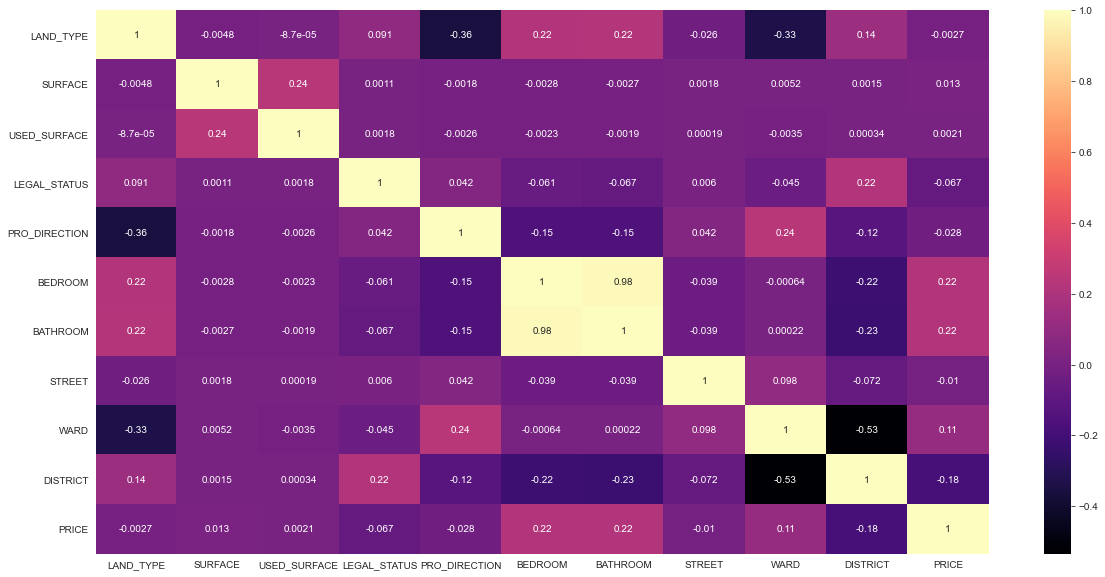

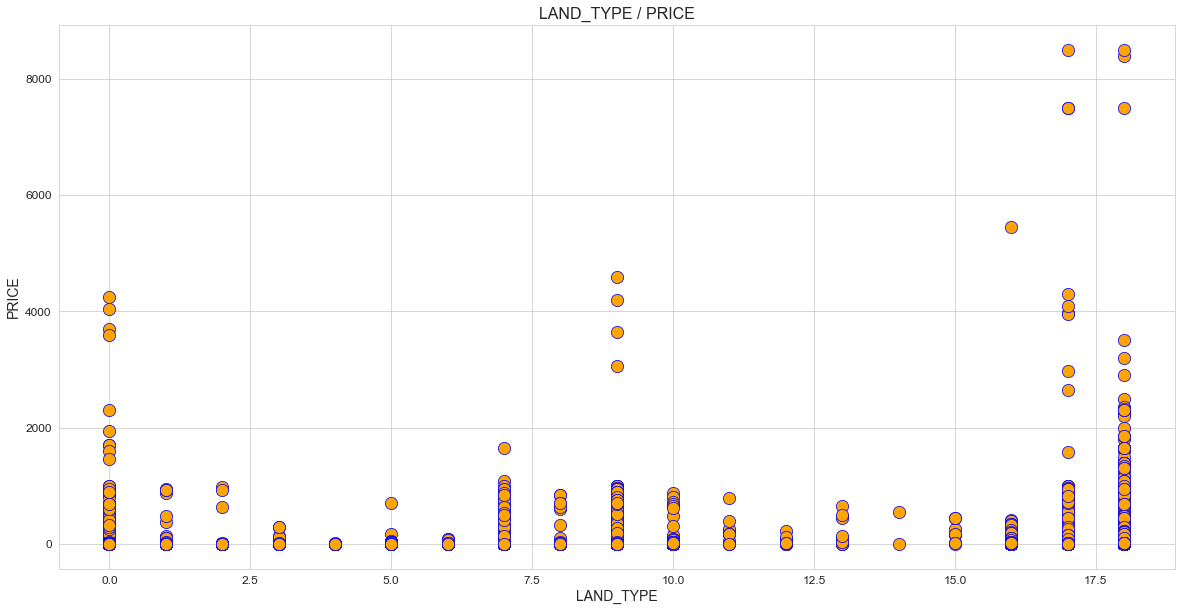

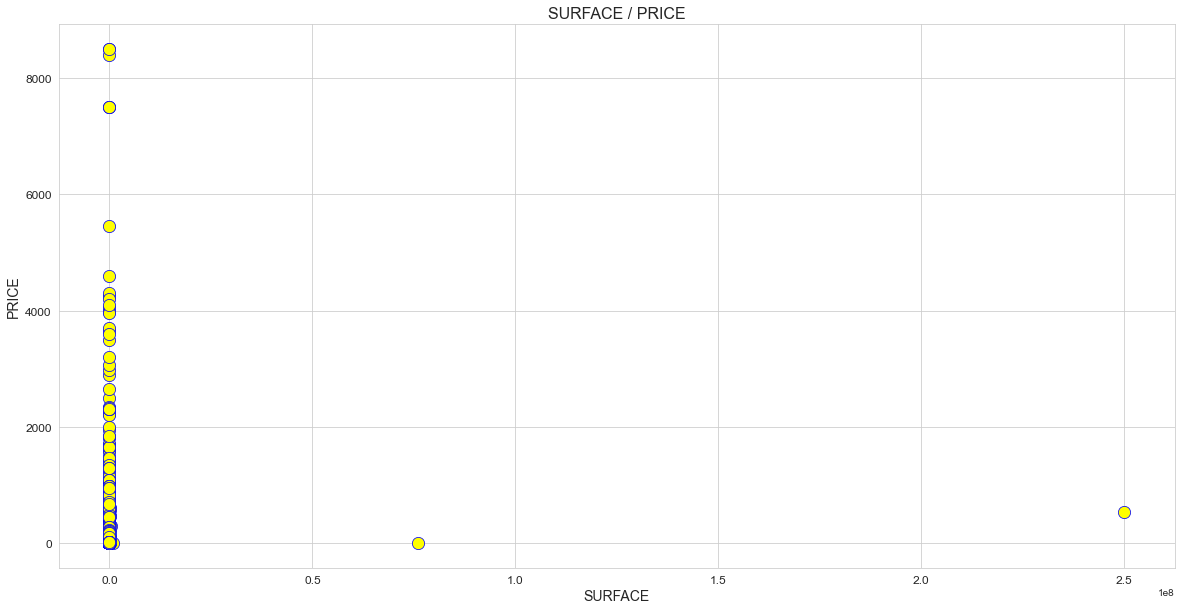

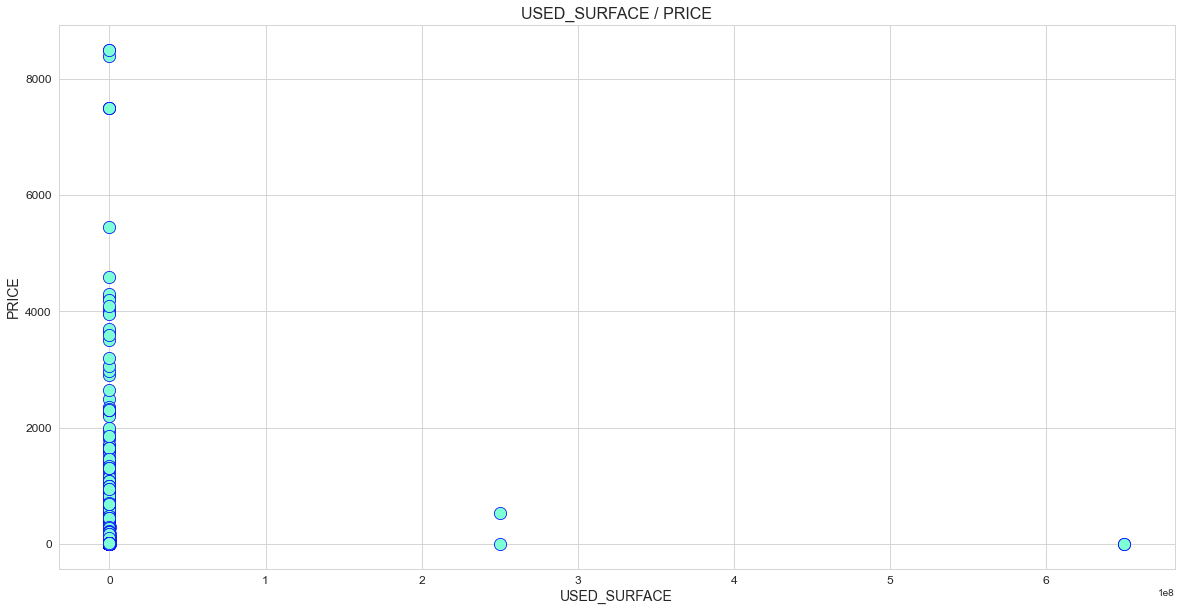

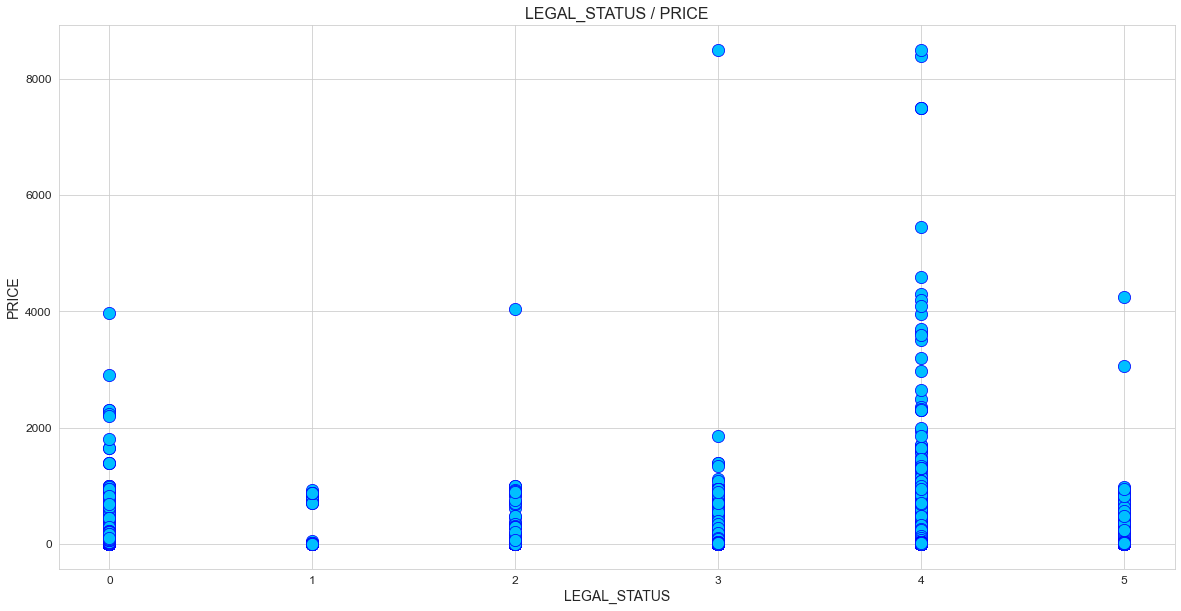

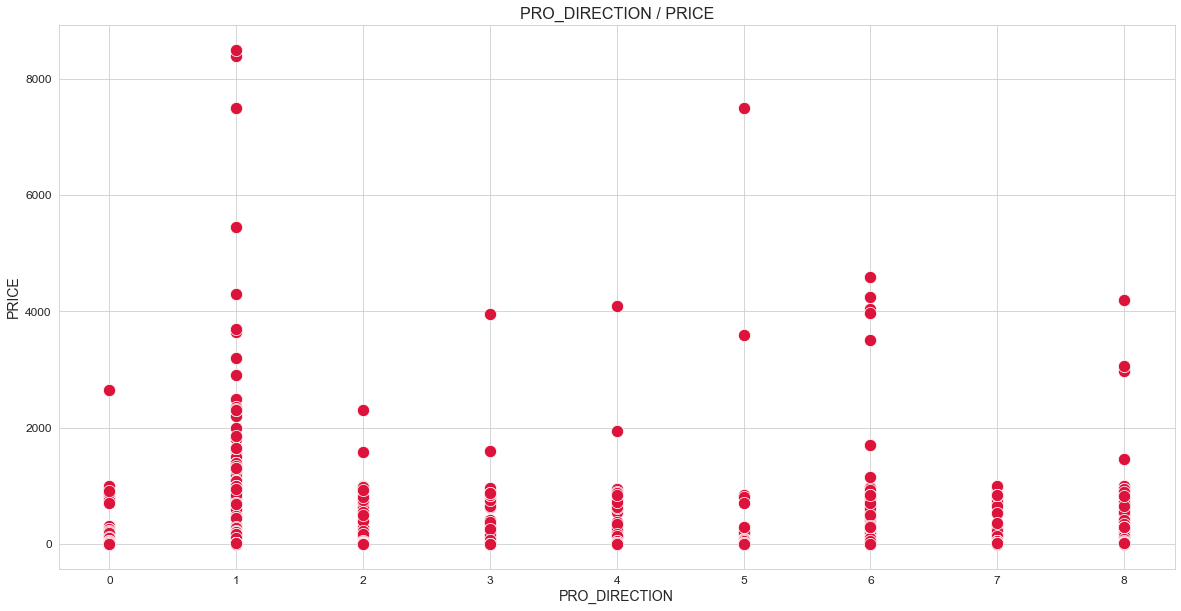

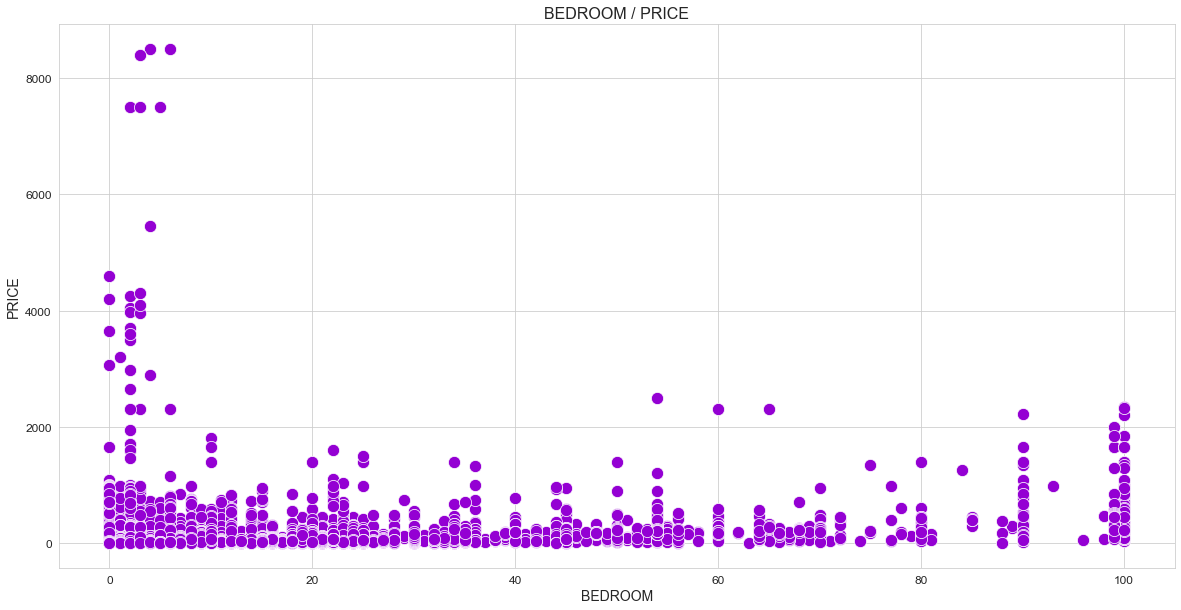

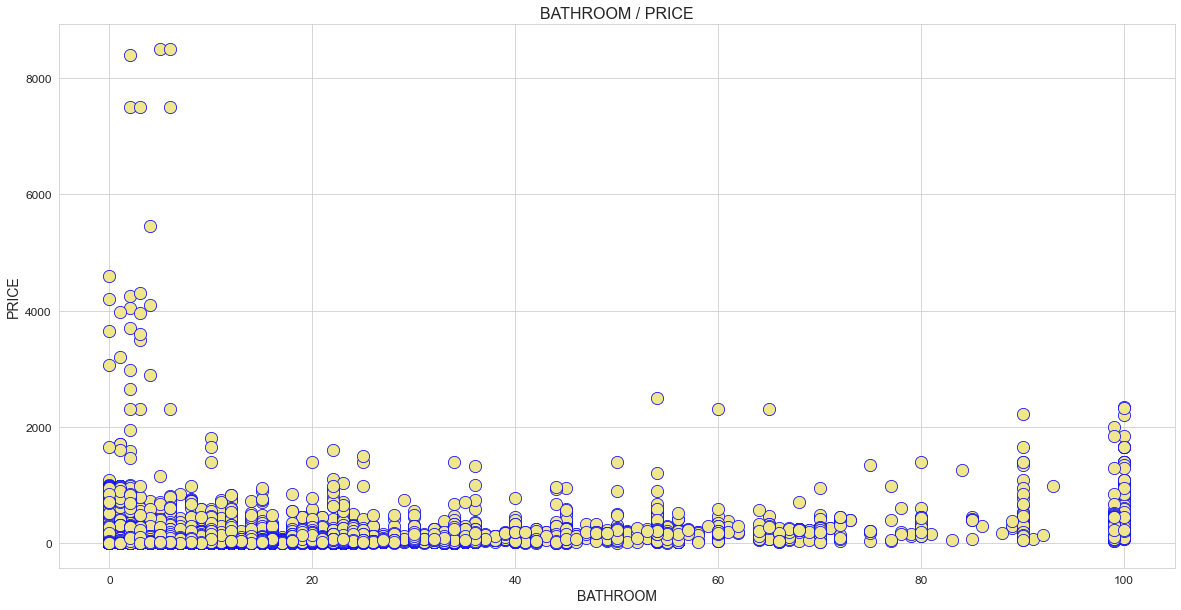

In [ ]:
# 1. Heatmap

sb.heatmap(hcm_sale.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = hcm_sale.drop(y_var, axis = 1)
    i = df.columns

    plot1 = sb.scatterplot(i[0], y_var, data = hcm_sale, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()

    plot2 = sb.scatterplot(i[1], y_var, data = hcm_sale, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()

    plot3 = sb.scatterplot(i[2], y_var, data = hcm_sale, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()

    plot4 = sb.scatterplot(i[3], y_var, data = hcm_sale, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()

    plot5 = sb.scatterplot(i[4], y_var, data = hcm_sale, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / PRICE'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()

    plot6 = sb.scatterplot(i[5], y_var, data = hcm_sale, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / PRICE'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()

    plot7 = sb.scatterplot(i[6], y_var, data = hcm_sale, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()

    plot8 = sb.scatterplot(i[7], y_var, data = hcm_sale, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()

    plot9 = sb.scatterplot(i[8], y_var, data = hcm_sale, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()

    plot10 = sb.scatterplot(i[9], y_var, data = hcm_sale, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / PRICE'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('PRICE', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()

scatter_df('PRICE')

# 3. Distribution plot

sb.distplot(hcm_sale['PRICE'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('PRICE', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

## Comment

From the given charts above, it seems like the variables BEDROOM, BATHROOM, WARD correlated strongest to the target variable PRICE, followed by the variables SURFACE, USED_SURFACE, PRO_DIRECTION, LEGAL_STATUS and LAND_TYPE.

# Feature Selection & Data Split

Now that we have all our required elements to build our linear regression models. Our next step is to select and define the dependent variables and the independent variables and split them into a train set and test set. Splitting the data can be done using the 'train_test_split' function provided by scikit-learn in python.

In [27]:
X_var = hcm_sale[['SURFACE', 'BEDROOM', 'BATHROOM','WARD','LAND_TYPE','LEGAL_STATUS','PRO_DIRECTION','USED_SURFACE']].values
y_var = hcm_sale['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[120.   2.   2.   7.  18.   4.   5. 500.]
 [ 56.   4.   3.  99.  17.   4.   0. 180.]
 [100.  23.  23.  12.  18.   4.   1. 294.]
 [164.  35.  35.   0.  18.   0.   1.  56.]
 [ 56.   3.   3. 106.  18.   4.   0. 160.]]
X_test samples :  [[ 55.    4.    4.   24.   17.    4.    1.   80. ]
 [115.    9.    9.    5.   18.    0.    1.  540. ]
 [ 60.    2.    2.   44.   17.    4.    6.  120. ]
 [ 67.5   5.    6.   23.   16.    4.    1.  263. ]
 [ 81.2   2.    2.    1.   17.    4.    1.  142. ]]
y_train samples :  [ 31.5   7.5  20.9 119.9   7.4]
y_test samples :  [ 4.7  1.3  3.6 11.  10.5]


# Modeling

In this process, we are going to build and train 5 different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Bayesian regression model, Elastic Net regression model. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. 

In [28]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# Model Evaluation

To evaluate our model we are going to use the ‘explained_variance_score’ metric and the ‘r2_score’ metric functions which are provided by the scikit-learn package in python. We are now going to compare the metric scores of each model and choose which model is more suitable for the given dataset.

## Explained Variance Score

When it comes to the ‘explained_variance_score’ metric, the score should not below 0.60 or 60%. If it is the case, then our built model is not sufficient for our data to solve the given case. So, the ideal score of the ‘explained_variance_score’ should be between 0.60 and 1.0.

In [29]:
print(cl('EXPLAINED VARIANCE SCORE of:', attrs = ['bold']))
print(cl('OLS model:  {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print(cl('Ridge model:  {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('Lasso model:  {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('Bayesian model:  {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('ElasticNet:  {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))

EXPLAINED VARIANCE SCORE of:
OLS model:  0.10665187701322554
Ridge model:  0.10665188693834815
Lasso model:  0.10665399288451016
Bayesian model:  0.10672025941935204
ElasticNet:  0.10665940593439782


## Comment

We can see that, every model while rounding the output values will result in a score of 0.10665 (10.665%) or 0.1067 (10.67%) which means sadly our model does not perform well on our dataset. 

However, coming to the case of choosing the best model, the Bayesian model seems to be more accurate comparing with the other models (on the basis of Explained Variance Score). It is followed by the ElasticNet model. The worst performer among the models is the OLS model. But frankly speaking, the differences are very much insignificant. 

Now, let’s move on to the final evaluation metric which is the ‘r2_score’ metric in python.


## R Square Score

Our next evaluation metric is the R-squared metric. The ideal R-squared score of a successful build should be more than 0.70 (at least > 0.60).

In [30]:
print(cl('R-SQUARED of:', attrs = ['bold']))
print(cl('OLS model:  {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print(cl('Ridge model:  {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('Lasso model:  {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('Bayesian model:  {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('ElasticNet:  {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))

R-SQUARED of:
OLS model:  0.10660396294292995
Ridge model:  0.10660397283134038
Lasso model:  0.10660607090369956
Bayesian model:  0.10667207063180639
ElasticNet:  0.10661146374015074


## Comment

After analysis, it is noted that the R-squared of the Bayesian model is again seemed to be the highest, indicating that it is the most suitable model for our dataset (on the basis of R-squared). It is followed by the ElasticNet model. The worst performer among the models is still the OLS model. But again, there are no remarkable differences among the results.

# Conclusion

We can conclude that none of the linear regression models can be used for our house price dataset. If there was more time, we could come up with better ML algorithms to fit best with our dataset.